In [86]:
# Imports
import pandas as pd

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [87]:
# Part 1 Data
citybikes = pd.read_csv('../data/sql_ready/citybikes.csv')

print(citybikes.shape)
print(citybikes.columns)

(190, 9)
Index(['station_id', 'station_name', 'station_address', 'station_latitude',
       'station_longitude', 'available_bikes', 'empty_bike_slots', 'poi_count',
       'poi_avg_rating'],
      dtype='object')


In [88]:
# Loading Part 2 Data
foursquare = pd.read_csv('../data/raw/semi_processed/fa_foursquare.csv')
yelp = pd.read_csv('../data/raw/semi_processed/ya_yelp.csv')

print(foursquare.shape)
print(foursquare.columns, "\n")

print(yelp.shape)
print(yelp.columns)

(8698, 12)
Index(['fsq_id', 'poi_name', 'poi_category_id', 'poi_rating',
       'poi_review_count', 'poi_latitude', 'poi_longitude', 'poi_address',
       'postal_code', 'station_id', 'distance_from_station', 'station_name'],
      dtype='object') 

(10022, 12)
Index(['yelp_id', 'poi_name', 'poi_category_id', 'poi_rating',
       'poi_review_count', 'poi_latitude', 'poi_longitude', 'poi_address',
       'postal_code', 'station_id', 'distance_from_station', 'station_name'],
      dtype='object')


In [89]:
# Rename Category Data
foursquare.rename(columns={'poi_category_id':'f_category_id'}, inplace=True)
yelp.rename(columns={'poi_category_id':'y_category_id'}, inplace=True)

print(foursquare.columns, "\n")
print(yelp.columns)

Index(['fsq_id', 'poi_name', 'f_category_id', 'poi_rating', 'poi_review_count',
       'poi_latitude', 'poi_longitude', 'poi_address', 'postal_code',
       'station_id', 'distance_from_station', 'station_name'],
      dtype='object') 

Index(['yelp_id', 'poi_name', 'y_category_id', 'poi_rating',
       'poi_review_count', 'poi_latitude', 'poi_longitude', 'poi_address',
       'postal_code', 'station_id', 'distance_from_station', 'station_name'],
      dtype='object')


In [90]:
# Merge Data
join1 = pd.concat([foursquare, citybikes])
print(f"{join1.shape} -- Join 1")
print(join1.columns, "\n")

join2 = pd.concat([yelp, citybikes])
print(f"{join2.shape} -- Join 2")
print(join2.columns, "\n")

all_data = pd.concat([join1, join2])
print(f"{all_data.shape} -- All Data")
print(all_data.columns, "\n")

(8888, 19) -- Join 1
Index(['fsq_id', 'poi_name', 'f_category_id', 'poi_rating', 'poi_review_count',
       'poi_latitude', 'poi_longitude', 'poi_address', 'postal_code',
       'station_id', 'distance_from_station', 'station_name',
       'station_address', 'station_latitude', 'station_longitude',
       'available_bikes', 'empty_bike_slots', 'poi_count', 'poi_avg_rating'],
      dtype='object') 

(10212, 19) -- Join 2
Index(['yelp_id', 'poi_name', 'y_category_id', 'poi_rating',
       'poi_review_count', 'poi_latitude', 'poi_longitude', 'poi_address',
       'postal_code', 'station_id', 'distance_from_station', 'station_name',
       'station_address', 'station_latitude', 'station_longitude',
       'available_bikes', 'empty_bike_slots', 'poi_count', 'poi_avg_rating'],
      dtype='object') 

(19100, 21) -- All Data
Index(['fsq_id', 'poi_name', 'f_category_id', 'poi_rating', 'poi_review_count',
       'poi_latitude', 'poi_longitude', 'poi_address', 'postal_code',
       'station_id',

In [91]:
print(all_data.shape)
print(all_data.nunique())

(19100, 21)
fsq_id                     669
poi_name                   932
f_category_id                3
poi_rating                  41
poi_review_count            74
poi_latitude              1086
poi_longitude             1106
poi_address               1047
postal_code                465
station_id                 190
distance_from_station    10509
station_name               190
station_address            163
station_latitude           190
station_longitude          190
available_bikes             19
empty_bike_slots            25
poi_count                   46
poi_avg_rating             152
yelp_id                    529
y_category_id                3
dtype: int64


In [92]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19100 entries, 0 to 189
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fsq_id                 8698 non-null   object 
 1   poi_name               18720 non-null  object 
 2   f_category_id          8698 non-null   float64
 3   poi_rating             10022 non-null  float64
 4   poi_review_count       10022 non-null  float64
 5   poi_latitude           18720 non-null  float64
 6   poi_longitude          18720 non-null  float64
 7   poi_address            18698 non-null  object 
 8   postal_code            18335 non-null  object 
 9   station_id             19100 non-null  object 
 10  distance_from_station  18720 non-null  float64
 11  station_name           19100 non-null  object 
 12  station_address        380 non-null    object 
 13  station_latitude       380 non-null    float64
 14  station_longitude      380 non-null    float64
 15  available

In [93]:
# Combined Data
all_data.to_csv('../data/raw/combined_data.csv', index=False)

# Going to clean this some...

> Check out the cleaning process [here](../data/cleaning.ipynb).

In [94]:
# Load Clean Data
hamilton_data = pd.read_csv('../data/sql_ready/hamilton_city_combined.csv')

print(f"{hamilton_data.shape} -- Hamilton Data")
print(hamilton_data.columns, "\n")
print(hamilton_data.nunique())

(18675, 14) -- Hamilton Data
Index(['fsq_id', 'poi_name', 'poi_rating', 'poi_review_count', 'poi_latitude',
       'poi_longitude', 'poi_address', 'postal_code', 'yelp_id', 'poi_id',
       'poi_category', 'station_id', 'distance_from_station', 'station_name'],
      dtype='object') 

fsq_id                     666
poi_name                   932
poi_rating                  41
poi_review_count            74
poi_latitude              1083
poi_longitude             1103
poi_address               1047
postal_code                465
yelp_id                    528
poi_id                    1194
poi_category                 3
station_id                 190
distance_from_station    10508
station_name               190
dtype: int64


In [95]:
# Make a copy
w_pois = hamilton_data.copy()

w_pois.columns

Index(['fsq_id', 'poi_name', 'poi_rating', 'poi_review_count', 'poi_latitude',
       'poi_longitude', 'poi_address', 'postal_code', 'yelp_id', 'poi_id',
       'poi_category', 'station_id', 'distance_from_station', 'station_name'],
      dtype='object')

In [96]:
# Group by Station Name -- Count the Number of POIs Per Station
count_pois = w_pois.groupby('station_name')['poi_id'].nunique()

counted_pois = pd.DataFrame(count_pois).reset_index()
counted_pois.rename(columns={'poi_id':'poi_count'}, inplace=True)

print(counted_pois.shape)
print(counted_pois.columns)

(190, 2)
Index(['station_name', 'poi_count'], dtype='object')


In [97]:
# Group by Rating -- Get the Average POI Rating Per Station
avg_poi_rating = w_pois.groupby('station_name')['poi_rating'].mean()

rated_pois = pd.DataFrame(avg_poi_rating).reset_index()
rated_pois.rename(columns={'poi_rating':'poi_avg_rating'}, inplace=True)

print(rated_pois.shape)
print(rated_pois.columns)

(190, 2)
Index(['station_name', 'poi_avg_rating'], dtype='object')


In [98]:
# Merge with Citybikes...
citybikes = pd.read_csv('../data/sql_ready/citybikes.csv') # Load Citybikes Data

print(citybikes.shape)
print(citybikes.columns)

(190, 9)
Index(['station_id', 'station_name', 'station_address', 'station_latitude',
       'station_longitude', 'available_bikes', 'empty_bike_slots', 'poi_count',
       'poi_avg_rating'],
      dtype='object')


In [99]:
# Add Columns
citybikes['poi_count'] = counted_pois['poi_count']
citybikes['poi_avg_rating'] = rated_pois['poi_avg_rating']

In [100]:
print(citybikes.shape)
print(citybikes.columns)

(190, 9)
Index(['station_id', 'station_name', 'station_address', 'station_latitude',
       'station_longitude', 'available_bikes', 'empty_bike_slots', 'poi_count',
       'poi_avg_rating'],
      dtype='object')


In [101]:
# Save Citybikes Data
citybikes.to_csv('../data/sql_ready/citybikes.csv', index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [102]:
# Import
import matplotlib.pyplot as plt
import numpy as np

<Figure size 1600x900 with 0 Axes>

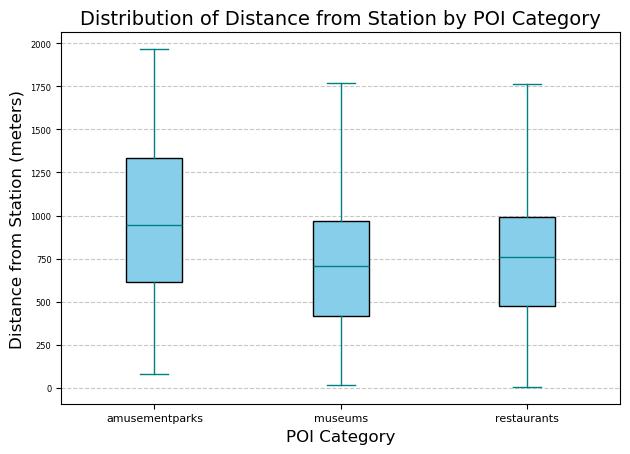

In [103]:
# Plotting -- Distance from Station by POI Category

# Figure Size
plt.figure(figsize=(16, 9))

# Boxplot
hamilton_data.boxplot(column="distance_from_station",
                        by="poi_category",
                        grid=False,
                        patch_artist=True,
                        showfliers=False,
                        color="teal",
                        boxprops=dict(facecolor="skyblue"))

# Pretties
plt.title("Distribution of Distance from Station by POI Category",
          size=14)
plt.suptitle("")  # Removing the default subplot title
plt.grid(axis="y",
         linestyle="--",
         alpha=0.7)
plt.xlabel("POI Category",
           size=12)
plt.ylabel("Distance from Station (meters)",
           size=12)
plt.xticks(size=8)
plt.yticks(size=6)

# Show the plot
plt.tight_layout()
plt.savefig('../images/distance_from_station_by_category.png', dpi=300)
plt.show()

The chart shows that museums and restaurants are closer to bike stations.

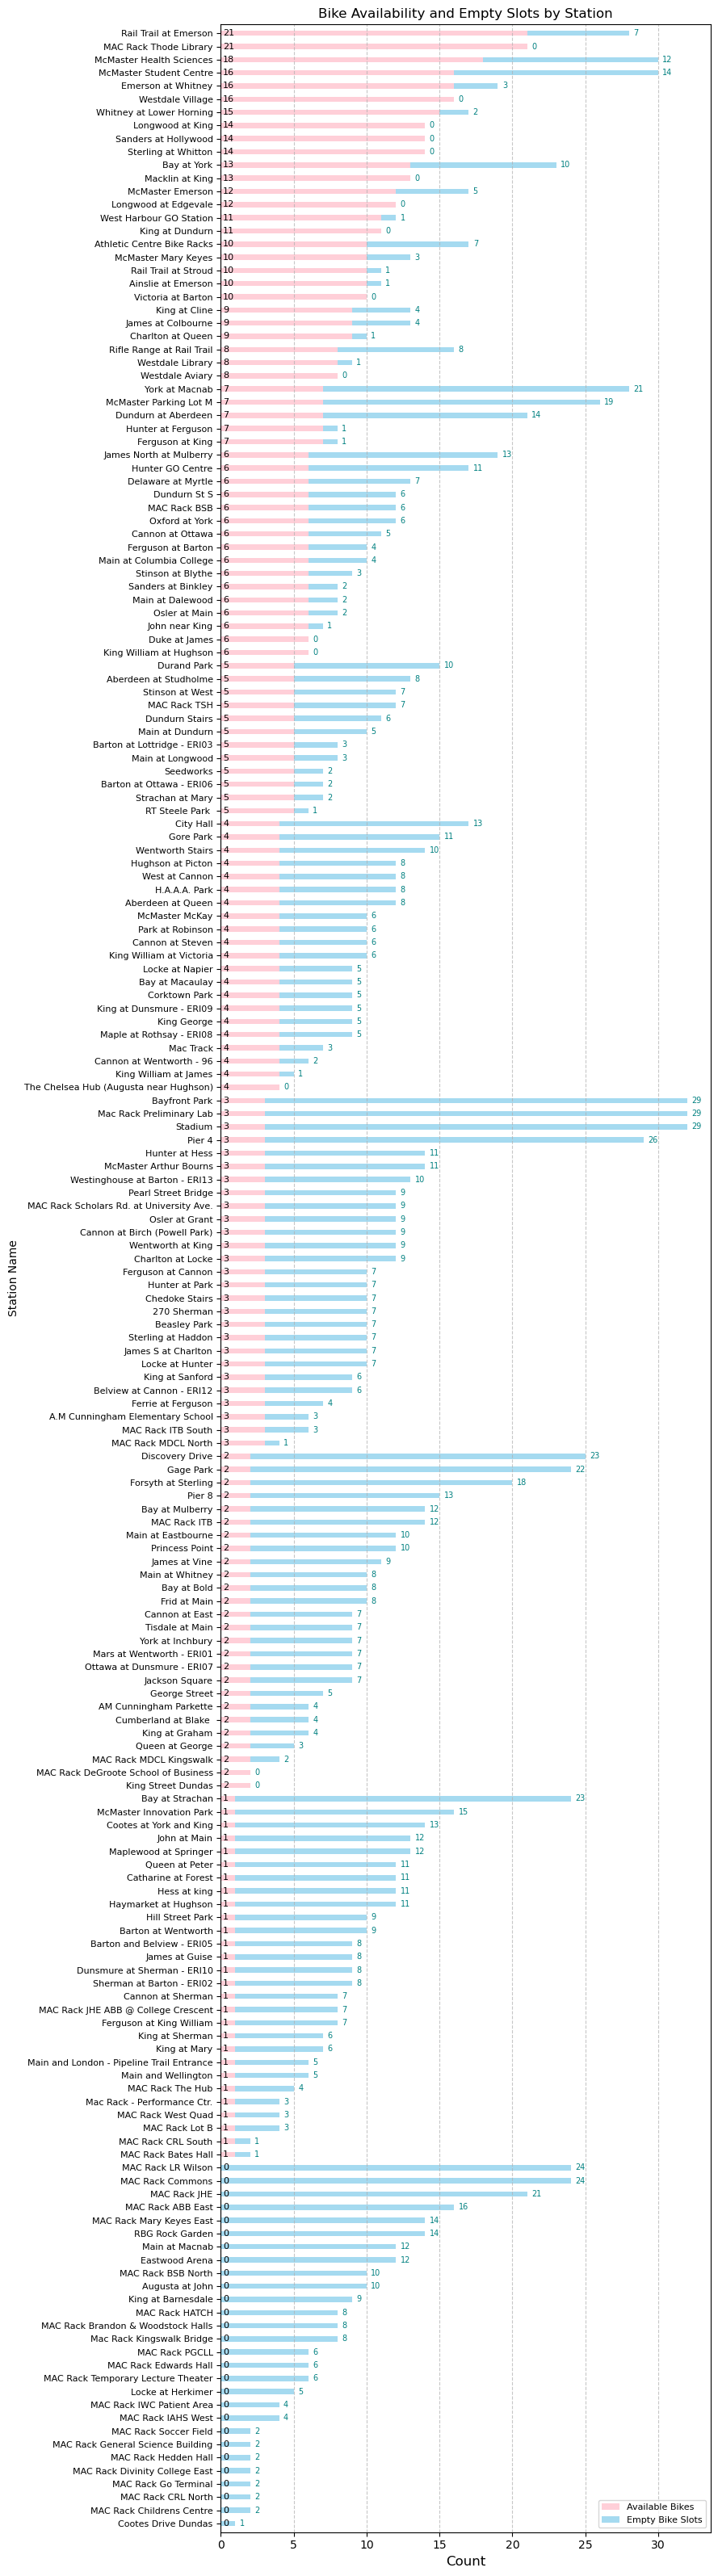

In [104]:
# Plotting -- Comparing `available_bikes` and `empty_bike_slots`

# Adjust figure
plt.figure(figsize=(9, 32))

# Sorting
citybikes_s = citybikes.sort_values(['available_bikes', 'empty_bike_slots'])

# Padding workaround
y_positions = np.arange(len(citybikes_s["station_name"])) * 1.5

# Data
y = citybikes_s["station_name"]
a = citybikes_s["available_bikes"]
b = citybikes_s["empty_bike_slots"]

bars1 = plt.barh(y_positions,
                  a,
                  label="Available Bikes",
                  alpha=0.75,
                  height=.6,
                  color='pink')
bars2 = plt.barh(y_positions,
                  b,
                  left=a,
                  label="Empty Bike Slots",
                  alpha=0.75,
                  height=.6,
                  color='skyblue')

# Adding labels for the count of available bikes on the bars
for bar in bars1:
    plt.text(0.15, bar.get_y() + bar.get_height() / 2,
             f"{int(bar.get_width())}",
             va='center', ha='left', fontsize=8, color='black')

# Adding labels for the count of empty slots at the end of the bars
for bar in bars2:
    plt.text(bar.get_width() + bar.get_x() + 0.3, bar.get_y() + bar.get_height() / 2,
             f"{int(bar.get_width())}",
             va='center', ha='left', fontsize=7, color='teal')

# Adding labels, title, and legend
plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)
plt.yticks(y_positions,
           y,
           size=8)
plt.xlabel("Count", size=12)
plt.ylabel("Station Name")
plt.title("Bike Availability and Empty Slots by Station")
plt.legend(fontsize=8)

# Explicitly setting y-axis limits to remove extra space
plt.ylim(min(y_positions) - 1, max(y_positions) + 1)

# Show the plot
plt.tight_layout()
plt.savefig('../images/bike_availability_chart.png', dpi=300)
plt.show() # This is a very long chart

There are stations with 0 bikes available and 0 empty bike slots. It might be worth examining if these are somehow related to the amount of POIs near the station.

# Database

In [105]:
# Imports
import sqlite3
from sqlite3 import Error

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [106]:
# Create a connection to the SQLite database file
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [107]:
connection = create_connection("../data/hamilton_db.sqlite")

Connection to SQLite DB successful


In [108]:
# This code tries to execute the given query and prints an error message if necessary.
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

Look at the data before and after the join to validate your data.

In [109]:
# Load the data
citybikes = pd.read_csv('../data/sql_ready/citybikes.csv')
hamilton_pois = pd.read_csv('../data/sql_ready/hamilton_pois.csv')
hamilton_city_combined = pd.read_csv('../data/sql_ready/hamilton_city_combined.csv')
foursquare_data = pd.read_csv('../data/sql_ready/foursquare_data.csv')
yelp_data = pd.read_csv('../data/sql_ready/yelp_data.csv')

print(f"{citybikes.shape} -- Citybikes")
print(citybikes.columns, "\n")

print(f"{hamilton_pois.shape} -- Hamilton POIs")
print(hamilton_pois.columns, "\n")

print(f"{hamilton_city_combined.shape} -- Hamilton City Combined")
print(hamilton_city_combined.columns, "\n")

print(f"{foursquare_data.shape} -- Foursquare POIs")
print(foursquare_data.columns, "\n")

print(f"{yelp_data.shape} -- Yelp POIs")
print(yelp_data.columns)

(190, 9) -- Citybikes
Index(['station_id', 'station_name', 'station_address', 'station_latitude',
       'station_longitude', 'available_bikes', 'empty_bike_slots', 'poi_count',
       'poi_avg_rating'],
      dtype='object') 

(1194, 11) -- Hamilton POIs
Index(['fsq_id', 'poi_name', 'poi_rating', 'poi_review_count', 'poi_latitude',
       'poi_longitude', 'poi_address', 'postal_code', 'yelp_id', 'poi_id',
       'poi_category'],
      dtype='object') 

(18675, 14) -- Hamilton City Combined
Index(['fsq_id', 'poi_name', 'poi_rating', 'poi_review_count', 'poi_latitude',
       'poi_longitude', 'poi_address', 'postal_code', 'yelp_id', 'poi_id',
       'poi_category', 'station_id', 'distance_from_station', 'station_name'],
      dtype='object') 

(666, 12) -- Foursquare POIs
Index(['fsq_id', 'poi_name', 'poi_category_id', 'poi_rating',
       'poi_review_count', 'poi_latitude', 'poi_longitude', 'poi_address',
       'postal_code', 'yelp_id', 'poi_id', 'poi_category'],
      dtype='object')

In [110]:
citybikes.nunique()

station_id           190
station_name         190
station_address      163
station_latitude     190
station_longitude    190
available_bikes       19
empty_bike_slots      25
poi_count             46
poi_avg_rating       152
dtype: int64

In [111]:
# Create Tables
citybikes_q = """
  CREATE TABLE IF NOT EXISTS citybikes (
    station_id TEXT PRIMARY KEY,
    station_name TEXT NOT NULL,
    station_address TEXT NOT NULL,
    station_latitude REAL NOT NULL,
    station_longitude REAL NOT NULL,
    available_bikes INTEGER NOT NULL,
    empty_bike_slots INTEGER NOT NULL,
    poi_count INTEGER NOT NULL,
    poi_avg_rating REAL NOT NULL
  );
"""

hamilton_pois_q = """
  CREATE TABLE IF NOT EXISTS hamilton_pois (
    poi_id TEXT PRIMARY KEY,
    poi_name TEXT NOT NULL,
    poi_rating REAL,
    poi_review_count INTEGER,
    poi_latitude REAL NOT NULL,
    poi_longitude REAL NOT NULL,
    poi_address TEXT,
    postal_code TEXT,
    poi_category TEXT NOT NULL,
    fsq_id TEXT,
    yelp_id TEXT,
    FOREIGN KEY (fsq_id) REFERENCES foursquare_data (fsq_id),
    FOREIGN KEY (yelp_id) REFERENCES yelp_data (yelp_id)
  );
"""

hamilton_pois_combined_q = """
  CREATE TABLE IF NOT EXISTS hamilton_city_combined (
    fsq_id TEXT,
    poi_name TEXT,
    poi_rating REAL,
    poi_review_count INTEGER,
    poi_latitude REAL,
    poi_longitude REAL,
    poi_address TEXT,
    postal_code TEXT,
    yelp_id TEXT,
    poi_id TEXT,
    poi_category TEXT,
    station_id TEXT,
    distance_from_station TEXT,
    station_name TEXT,
    FOREIGN KEY (poi_id) REFERENCES hamilton_pois (poi_id),
    FOREIGN KEY (yelp_id) REFERENCES yelp_data (yelp_id),
    FOREIGN KEY (fsq_id) REFERENCES foursquare_data (fsq_id),
    FOREIGN KEY (station_id) REFERENCES citybikes (station_id)
  );
"""

foursquare_data_q = """
  CREATE TABLE IF NOT EXISTS foursquare_data (
    fsq_id TEXT PRIMARY KEY,
    poi_name TEXT NOT NULL,
    poi_category_id TEXT NOT NULL,
    poi_rating REAL,
    poi_review_count INTEGER,
    poi_latitude REAL NOT NULL,
    poi_longitude REAL NOT NULL,
    poi_address TEXT,
    postal_code TEXT,
    yelp_id TEXT,
    poi_id TEXT NOT NULL,
    poi_category TEXT NOT NULL,
    FOREIGN KEY (poi_id) REFERENCES hamilton_pois (poi_id)
  );
"""

yelp_data_q = """
  CREATE TABLE IF NOT EXISTS yelp_data (
    yelp_id TEXT PRIMARY KEY,
    poi_name TEXT NOT NULL,
    poi_category_id TEXT NOT NULL,
    poi_rating REAL,
    poi_review_count INTEGER,
    poi_latitude REAL NOT NULL,
    poi_longitude REAL NOT NULL,
    poi_address TEXT,
    postal_code TEXT,
    fsq_id TEXT,
    poi_id TEXT NOT NULL,
    poi_category TEXT NOT NULL,
    FOREIGN KEY (poi_id) REFERENCES hamilton_pois (poi_id)
  );
"""

In [112]:
# Create the tables
execute_query(connection, citybikes_q)
execute_query(connection, hamilton_pois_q)
execute_query(connection, hamilton_pois_combined_q)
execute_query(connection, foursquare_data_q)
execute_query(connection, yelp_data_q)

Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully


In [113]:
citybikes.to_sql('citybikes', connection, if_exists='append', index=False)

190

In [114]:
hamilton_pois.to_sql('hamilton_pois', connection, if_exists='append', index=False)

1194

In [115]:
hamilton_city_combined.to_sql('hamilton_city_combined', connection, if_exists='append', index=False)

18675

In [116]:
foursquare_data.to_sql('foursquare_data', connection, if_exists='append', index=False)

666

In [117]:
yelp_data.to_sql('yelp_data', connection, if_exists='append', index=False)

528

Verifying Changes

In [118]:
# Query to get all the data from the database
df_all = pd.read_sql_query("""SELECT 
                            name
                        FROM sqlite_master 
                        WHERE type ='table' 
                            AND name NOT LIKE 'sqlite_%';
                     """, connection)

df_all

,name
0,citybikes
1,hamilton_pois
2,hamilton_city_combined
3,foursquare_data
4,yelp_data


In [119]:
# Query to check all data in each table, LIMIT 1 -- I just want to see the columns
qcitybikes = """SELECT * FROM citybikes LIMIT 1"""
qhamilton_pois = """SELECT * FROM hamilton_pois LIMIT 1"""
qhamilton_city_combined = """SELECT * FROM hamilton_city_combined LIMIT 1"""
qfoursquare_data = """SELECT * FROM foursquare_data LIMIT 1"""
qyelp_data = """SELECT * FROM yelp_data LIMIT 1"""

In [120]:
qcitybikes_s = pd.read_sql_query(qcitybikes, connection)
qhamilton_pois_s = pd.read_sql_query(qhamilton_pois, connection)
qhamilton_city_combined_s = pd.read_sql_query(qhamilton_city_combined, connection)
qfoursquare_data_s = pd.read_sql_query(qfoursquare_data, connection)
qyelp_data_s = pd.read_sql_query(qyelp_data, connection)

print(qcitybikes_s.shape)
print(qhamilton_pois_s.shape)
print(qhamilton_city_combined_s.shape)
print(qfoursquare_data_s.shape)
print(qyelp_data_s.shape)

(1, 9)
(1, 11)
(1, 14)
(1, 12)
(1, 12)


Data appears to have migrated successfully.

In [121]:
# Close the connection
connection.close()